In [1]:
import copy
import re
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

p = re.compile('''([a-z\_]+),([\-0-9]+),([0-9]+),([0-9]+)''')

def read(file_name):
    with open(file_name) as json_file:
        message = json_file.read()

    result = p.finditer(message)
    i = 0
    temp = []
    for r in result:
        key = str(r.group(1))
        flow_id = int(r.group(2))
        flow_time = int(r.group(3))
        value = int(r.group(4))
        temp.append([flow_time, flow_id, key, value])

    table = pd.DataFrame(temp, columns=['time', 'flow_id', 'key', 'value'])
    #data = table.sort_values(["time"], ascending=[True])
    temp = table[table['flow_id'] != 0]
    print(temp['flow_id'].value_counts())
    remove_id = temp['flow_id'].value_counts().keys()[2:]
    table = table.loc[table['flow_id'].isin(remove_id) == False]

    temp = table[table['flow_id'] != 0]
    subflow_id = temp.sort_values(["time"], ascending=[True])
    first_flow = subflow_id.iloc[0]['flow_id']
    print("fast flow", first_flow)
    table.loc[table['flow_id'] == 0, 'flow_id'] = 'meta'
    table.loc[table['flow_id'] == first_flow, 'flow_id'] = 'sub1'
    table.loc[(table['flow_id'] != 'meta') & (table['flow_id'] != 'sub1') , 'flow_id'] = 'sub2'

    min_time = table.loc[:,"time"].min()
    max_time = table.loc[:,"time"].max()
    table.loc[:,"time"] = (table.loc[:,"time"] - min_time) / 250

    table = table.sort_values(["time"], ascending=[True])
    return table

def view(table, flow_id, key, time_s = 0, time_e = 30):
    flow = table.loc[table["flow_id"] == flow_id]
    flow = flow.loc[(flow['time'] > time_s) & (flow['time'] < time_e)]
    flow = flow.loc[flow['key'] == key]
    x = flow['time']
    y = flow["value"]

    nx = []
    ny = []
    for i in range(0,len(x)):
        nx.append(x.iloc[i])
        ny.append(y.iloc[i])
        
        if (len(x) != i + 1):
            nx.append(x.iloc[i + 1])
            ny.append(y.iloc[i])
    plt.plot(nx, ny)
    plt.scatter(nx,ny,c='r', s=1)
    plt.xlabel("Time (sec)")
    plt.ylabel(key)
    #plt.ylim(0,500)
    plt.title(flow_id + " " + key)
    plt.figure(figsize=(7,7))
    plt.show()
    
# 패킷 개수 확인
def packet_binning(table, flow_id, key, time_s = 0, time_e = 30):
    flow = table.loc[table["flow_id"] == flow_id]
    flow = flow.loc[(flow['time'] > time_s) & (flow['time'] < time_e)]
    flow = flow.loc[flow['key'] == key]
    bins = []
    for i in range(0,60000,10):
        bins.append(i / 1000)
    trans = flow.groupby(pd.cut(flow['time'], bins=bins)).size()

    
    color="blue"
    
    if (flow_id=='sub2' or key=='receive'):
        color="orange"
    plt.plot(bins[:len(trans)], trans, c = color, linewidth=1)
    plt.xlabel("Time (sec)")
    plt.ylabel(key + ' Packets/10ms')
    plt.xlim(time_s, time_e)
    plt.show()

In [2]:
default = read("default.txt");
blest = read("blest.txt");
redundant = read("redundant.txt");
only_fast = read("only_fast.txt");
  

2560    7214
8704    6755
3952       6
6000       3
Name: flow_id, dtype: int64
fast flow 2560
-8336    7001
-2192    6950
-6944       6
-4896       3
Name: flow_id, dtype: int64
fast flow -8336
6608    13835
1152    13598
7440        7
5392        5
Name: flow_id, dtype: int64
fast flow 6608
-2416    7202
-6272    6825
-1584       6
-3632       5
Name: flow_id, dtype: int64
fast flow -2416


In [3]:
default = read("default.txt");
blest = read("blest.txt");
redundant = read("redundant.txt");
only_fast = read("only_fast.txt");


2560    7214
8704    6755
3952       6
6000       3
Name: flow_id, dtype: int64
fast flow 2560
-8336    7001
-2192    6950
-6944       6
-4896       3
Name: flow_id, dtype: int64
fast flow -8336
6608    13835
1152    13598
7440        7
5392        5
Name: flow_id, dtype: int64
fast flow 6608
-2416    7202
-6272    6825
-1584       6
-3632       5
Name: flow_id, dtype: int64
fast flow -2416


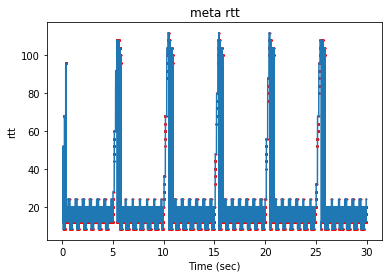

<Figure size 504x504 with 0 Axes>

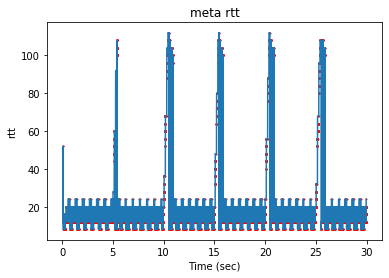

<Figure size 504x504 with 0 Axes>

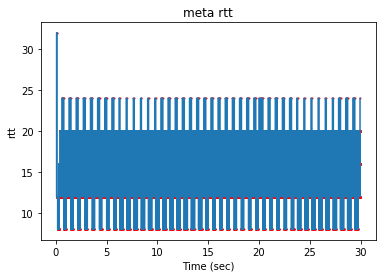

<Figure size 504x504 with 0 Axes>

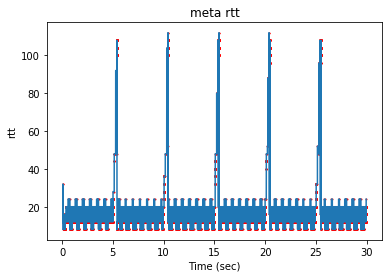

<Figure size 504x504 with 0 Axes>

In [4]:
view(default, 'meta','rtt',0,30)   
view(blest, 'meta','rtt',0,30)   
view(redundant, 'meta','rtt',0,30)  
view(only_fast, 'meta','rtt',0,30)   

-5008    96851
-9872       55
Name: flow_id, dtype: int64
fast flow -9872


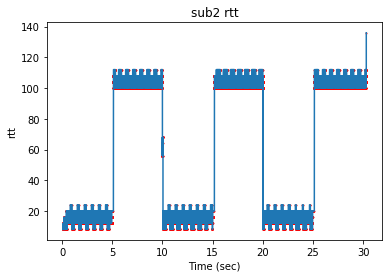

<Figure size 504x504 with 0 Axes>

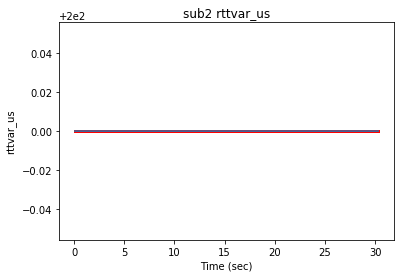

<Figure size 504x504 with 0 Axes>

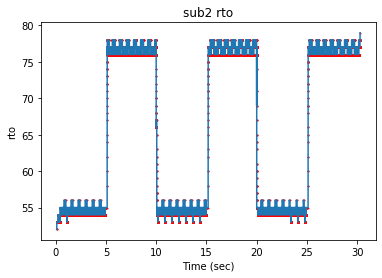

<Figure size 504x504 with 0 Axes>

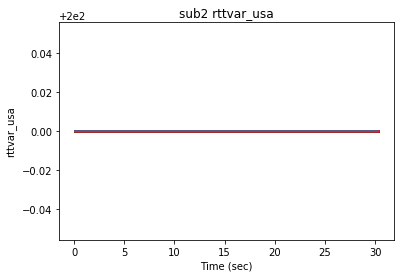

<Figure size 504x504 with 0 Axes>

In [5]:
d = read("messages")
view(d, 'sub2','rtt',0,60)   
view(d, 'sub2','rttvar_us',0,60)   
view(d, 'sub2','rto',0,60)   
view(d, 'sub2','rttvar_usa',0,60)   
#view(d, 'sub2','cwnd',0,60)   
#view(d, 'sub2','rtt',0,60)   